In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [12]:
df = pd.read_csv("PERHITUNGAN KNN DAN MKNN.csv")

df.head()

,No,RM,Nama,Tgl Lahir,Alamat,Tgl Masuk,Tgl Keluar,mual,muntah,muntah_darah,...,demam,BAB_normal,BAB_tidak_lancar,BAB_cair,BAB_Hitam,BAB_darah,flatus,lemas,nafsu_makan_menurun,Diagnosa_Utama
0,1,394117,ZAKARIA,2/5/1974,ABEUK TINGKEM JEUMPA,3/1/2021,06-01-2021(4),1,1,1,...,1,2,1,1,1,1.0,2,1,1,Abdominal Pain
1,2,340884,HABSAH,1/7/1973,PULO KITON KOTA JUANG,30-12-2020,01-01-2021 (2),2,1,1,...,1,2,1,1,1,1.0,1,1,1,Abdominal Pain
2,3,394265,DAHLAN HARUN,31-12-1955,COT TUFAH GANDA PURA,5/1/2021,08-01-2021(4),1,1,1,...,1,2,1,1,2,2.0,1,1,1,GI Haemorrhage
3,4,394292,ANWAR,11/4/1960,PADANG KASAB PLIMBANG,6/1/2021,08-01-2021(3),2,1,1,...,1,2,1,1,1,1.0,2,1,1,Abdominal Pain
4,5,334929,ZAINUDDIN,1/7/1950,GEULANGGANG LABU PEUSANGAN,24-01-2021,28-01-2021,1,1,1,...,1,1,2,1,1,1.0,2,1,2,Gastritis


In [13]:
df.drop(columns=["No", "RM", "Nama", "Tgl Lahir", "Alamat", "Tgl Masuk", "Tgl Keluar"], inplace=True)

df.head()

,mual,muntah,muntah_darah,mulut_asam,benjolan_dalam_perut,dada_panas,jantung_berdebar,nyeri_dada,sendawa,sesak,...,demam,BAB_normal,BAB_tidak_lancar,BAB_cair,BAB_Hitam,BAB_darah,flatus,lemas,nafsu_makan_menurun,Diagnosa_Utama
0,1,1,1,1,1,1,1,2,1,2,...,1,2,1,1,1,1.0,2,1,1,Abdominal Pain
1,2,1,1,1,1,1,1,1,1,1,...,1,2,1,1,1,1.0,1,1,1,Abdominal Pain
2,1,1,1,1,1,1,1,1,1,1,...,1,2,1,1,2,2.0,1,1,1,GI Haemorrhage
3,2,1,1,1,1,1,1,2,1,1,...,1,2,1,1,1,1.0,2,1,1,Abdominal Pain
4,1,1,1,1,1,1,1,1,1,1,...,1,1,2,1,1,1.0,2,1,2,Gastritis


In [23]:
df.dropna(inplace=True)

In [32]:
df["mual"].value_counts()

mual
2    184
1     78
Name: count, dtype: int64

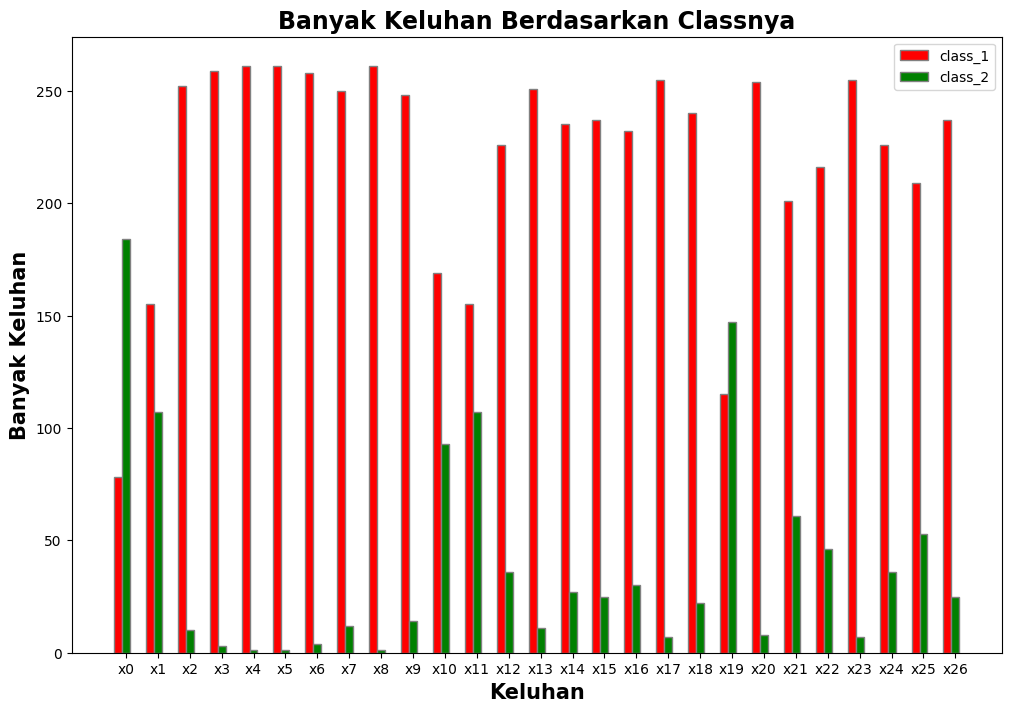

In [67]:
# get columns and value counts each category
columns = df.columns[:-1]
type1 = [df[col].value_counts()[1] for col in columns]
type2 = [df[col].value_counts()[2] for col in columns]

# set width of bar 
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8)) 

# get position of bar
br1 = np.arange(len(type1)) 
br2 = [x + barWidth for x in br1] 

# Make the plot
plt.bar(br1, type1, color ='r', width = barWidth, 
        edgecolor ='grey', label ='class_1') 
plt.bar(br2, type2, color ='g', width = barWidth, 
        edgecolor ='grey', label ='class_2') 

# Adding label 
plt.title("Banyak Keluhan Berdasarkan Classnya",  fontweight ='bold', fontsize = 17)
plt.xlabel('Keluhan', fontweight ='bold', fontsize = 15) 
plt.ylabel('Banyak Keluhan', fontweight ='bold', fontsize = 15) 

plt.xticks([r + barWidth for r in range(len(type1))], ["x" + str(i) for i in range(len(columns))])
plt.legend()

In [75]:
df["Diagnosa_Utama"].value_counts().values

array([48, 47, 45, 35, 28, 26, 21, 11,  1], dtype=int64)

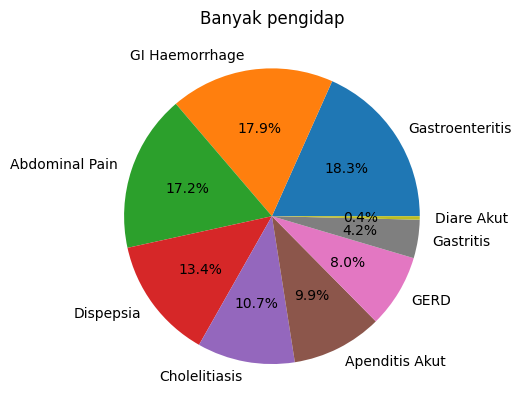

In [78]:
# get value counts by unique
jenis_diagnosis = df["Diagnosa_Utama"].value_counts().keys()
banyak_didiagnosa = df["Diagnosa_Utama"].value_counts().values

# show data
plt.title("Banyak pengidap")
plt.pie(
    banyak_didiagnosa,
    labels=jenis_diagnosis,
    autopct='%1.1f%%'
)

plt.show()

Berdasarkan dari data di atas kita dapat melihat bahwa yang mengidap penyakit yang paling tinggi adalah dengan diagnosis Abdominal Pain yang mana persentase yang paling tinggi. Sedangkan yang terkecil adalah diare akut. Hal ini akan memengaruhi dari hasil model nantinya karena jumlah keseimbangan data yang sedikit berbeda akan menimbulkan terjadinya overfitting